In [1]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename to `file`
file = 'Источник данных.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

# Print the sheet names
print(xl.sheet_names)

# Load a sheet into a DataFrame by name: df1
df1 = xl.parse('Источник данных')

['Источник данных']


In [2]:
df1

,Количество ступеней в насосе,Давление (абсолютное) на Выходе насоса,Давление (абсолютное) на ВХоде насоса,Газосодержание на ВХоде в насос,Расход жидкости (объемный),Плотность жидкости,Плотность газа (при нормальных условиях),Подача (ступень-А1),Напор (ступень-А1),Частота вращения ротора (ступень-А1),Диаметр ротора (ступень-А1),Частота вращения ротора (ступень-А2),Диаметр ротора (ступень-А2)
0,200,12500000,3000000,0.25,0.000926,1000,1.2,193.1,9,3000,0.06,3000,0.06
1,200,12500000,3000000,0.25,0.000926,1000,1.2,193.1,9,3000,0.06,3000,0.06
2,200,12500000,3000000,0.25,0.000926,1000,1.2,193.1,9,3000,0.06,3000,0.06
3,200,12500000,3000000,0.25,0.000926,1000,1.2,193.1,9,3000,0.06,3000,0.06
4,200,12500000,3000000,0.25,0.000926,1000,1.2,193.1,9,3000,0.06,3000,0.06
5,200,12500000,3000000,0.25,0.000926,1000,1.2,193.1,9,3000,0.06,3000,0.06
6,200,12500000,3000000,0.25,0.000926,1000,1.2,193.1,9,3000,0.06,3000,0.06
7,200,12500000,3000000,0.25,0.000926,1000,1.2,193.1,9,3000,0.06,3000,0.06
8,200,12500000,3000000,0.25,0.000926,1000,1.2,193.1,9,3000,0.06,3000,0.06
9,200,12500000,3000000,0.25,0.000926,1000,1.2,193.1,9,3000,0.06,3000,0.06


In [3]:
#количество насосов
count = len(df1['Количество ступеней в насосе'])
print(count)

20


In [10]:
# Расчет параметров характеристики для насосовой ступени А2
a2=[]
b2=[]
for i in range(count):
    a2.append(df1['Подача (ступень-А1)'][i]*(df1['Частота вращения ротора (ступень-А2)'][i]/
                                             df1['Частота вращения ротора (ступень-А1)'][i])*
              (df1['Диаметр ротора (ступень-А2)'][i]/df1['Диаметр ротора (ступень-А1)'][i])**3)

for i in range(count):
    b2.append(df1['Напор (ступень-А1)'][i] * (df1['Частота вращения ротора (ступень-А2)'][i] /
                                             df1['Частота вращения ротора (ступень-А1)'][i])**2 * 
              (df1['Диаметр ротора (ступень-А2)'][i] / df1['Диаметр ротора (ступень-А1)'][i])**2)
    

In [107]:
#кол-во № п.п.
pp = int(input('Введите количество №п.п.'))

AL=[]
for i in range (count):
    col=0
    for j in range(pp):
        col=col+1
        AL.append(col)

#Расход жидкости (массовый)
AX = []

for i in range (count):
    for j in range(pp):
        AX.append(df1['Расход жидкости (объемный)'][i] * df1['Плотность жидкости'][i])


Введите количество №п.п.500


In [15]:
#Расход газа (объемный), на входе в насос
AU = []

for i in range (count):
    for j in range(pp):
        AU.append(df1['Расход жидкости (объемный)'][i] * df1['Газосодержание на ВХоде в насос'][i] /
                  * (1-df1['Газосодержание на ВХоде в насос'][i]))

In [18]:
#Расход газа (массовый)
AY = []

for i in range (count):
    for j in range(pp):
        AY.append(AU[i] * df1['Давление (абсолютное) на ВХоде насоса'][i] /100000
                  * df1['Плотность газа (при нормальных условиях)'][i])

In [20]:
#Расход смеси ГЖС (массовый)
AZ = []

for i in range (count):
    for j in range(pp):
        AZ.append(AX[i] + AY[i])

In [64]:
#Расход газа (объемный), на выходе ступени
BG = []
#Плотность смеси ГЖС 
BB = []
#Давление на ВХоде ступени насосной
BI = []
#Давление на выходе ступени насосной
BF = []
#Напор ступени насосной (расчетный) при плотности 1000 кг/м3
BC=[]
#Расход ГЖС (объемный), на выходе ступени
BH=[]
#Давление ступени насосной с поправкой на плотность 
BE=[]

for i in range (count):
    BF.append(df1['Давление (абсолютное) на Выходе насоса'][i])
    for j in range(pp):
        BG.append(AU[i+j]*df1['Давление (абсолютное) на ВХоде насоса'][i]/BF[i+j])
        BH.append(BG[i+j]+df1['Расход жидкости (объемный)'][i])
        BC.append(((1-((BH[i+j]*3600*24)**2)/(a2[i]**2)))**(0.5)*b2[i])
        BB.append(AZ[i+j]/(df1['Расход жидкости (объемный)'][i]+BG[i+j]))
        BE.append(BB[i+j] * 9.81 * BC[i+j])
        BI.append(BF[i+j]-BE[i+j])
        BF.append(BI[i+j])
    del BF[-1]
       
       

In [69]:
#Давление (абсолютное) на входе ступени насосной
AN = []

for i in range (count):
    for j in range(pp):
        if df1['Давление (абсолютное) на ВХоде насоса'][i]<=BI[i+j]:
            AN.append(BI[i+j])
        else:
            AN.append(df1['Давление (абсолютное) на ВХоде насоса'][i])

In [71]:
#Давление на выходе ступени насосной
AH = []

for i in range (count):
    for j in range(pp):
        if AN[i+j]>df1['Давление (абсолютное) на ВХоде насоса'][i]:
            AH.append(BF[i+j])
        else:
            AH.append(df1['Давление (абсолютное) на ВХоде насоса'][i])

In [73]:
#Давление на выходе ступени насосной
AE = []

for i in range (count):
    for j in range(pp):
        if AH[i+j]>df1['Давление (абсолютное) на ВХоде насоса'][i]:
            AE.append(1)
        else:
            AE.append(0)

In [79]:
#Количество работающих ступеней
inwork = []

for i in range (count):
    summa=0
    for j in range(pp):
        summa=summa + AE[i+j]
    inwork.append(summa)

#Количество неработающих ступеней
not_work=[]
for i in range(count):
    not_work.append(df1['Количество ступеней в насосе'][i] - inwork[i])

In [86]:
#Количество ступеней в насосе
AF=[]
for i in range (count):
    for j in range(pp):
        AF.append(df1['Количество ступеней в насосе'][i])

In [90]:
#Давление (абсолютное) на выходе насоса
AG=[]
for i in range (count):
    for j in range(pp):
        AG.append(df1['Давление (абсолютное) на Выходе насоса'][i])

In [104]:
#Давление на выходе ступени насосной
AI=[]
for i in range (count):
    for j in range(pp):
        AI.append(AH[i+j]/1000000)

In [103]:
#Номер ступени, при кавитации
AJ=[]
AK=[]
j=0

for i in range (count):
    AK.append(AF[i+j])
    for j in range(pp):
        AK.append(AK[-1]-1)
        if AK[i+j]>0:
            AJ.append(AK[i+j])
        else:
            AJ.append(1)
    del AK[-1]

In [110]:
#Давление (абсолютное) на входе насоса
AM=[]
for i in range (count):
    for j in range(pp):
        AM.append(df1['Давление (абсолютное) на ВХоде насоса'][i])

In [115]:
#Газосодержание на входе в насос
AO=[]
for i in range (count):
    for j in range(pp):
        AO.append(df1['Газосодержание на ВХоде в насос'][i])

In [118]:
#Расход газа (объемный), на входе в ступень

AV=[]

for i in range (count):
    for j in range(pp):
        AV.append(AU[i+j]*AM[i+j]/BI[i+j])

In [120]:
#Расход жидкости (объемный)

AR=[]

for i in range (count):
    for j in range(pp):
        AR.append(df1['Расход жидкости (объемный)'][i])

In [121]:
#Газосодержание на входе ступени
AQ=[]

for i in range (count):
    for j in range(pp):
        AQ.append(AV[i+j]/(AV[i+j]+AR[i+j]))

In [126]:
#Газосодержание на входе ступени (при кавитации)
AP=[]

for i in range (count):
    for j in range(pp):
        if AQ[i+j]<=AO[i+j]:
            AP.append(AQ[i+j])
        else:
            AP.append(AO[i+j])

In [133]:
#Плотность жидкости

AS=[]

for i in range (count):
    for j in range(pp):
        AS.append(df1['Плотность жидкости'][i])

In [137]:
#Плотность газа (при нормальных условиях)

AT=[]

for i in range (count):
    for j in range(pp):
        AT.append(df1['Плотность газа (при нормальных условиях)'][i])

In [145]:
#Расход смеси ГЖС (объемный), на входе в ступень

AW=[]

for i in range (count):
    for j in range(pp):
        AW.append(AR[i+j]+AV[i+j])

In [155]:
#Плотность смеси ГЖС 

BB=[]

for i in range (count):
    for j in range(pp):
        BB.append(AZ[i+j]/(AR[i+j]+BG[i+j]))

In [156]:
#Плотность смеси ГЖС (при кавитации)
BA=[]

for i in range (count):
    for j in range(pp):
        if AN[i+j]>AM[i+j]:
            BA.append(BB[i+j])
        else:
            BA.append(AZ[i+j]/(AR[i+j]+AU[i+j]))

In [164]:
#Поправка по плотности 

BD=[]

for i in range (count):
    for j in range(pp):
        BD.append(BB[i+j]/1000)

In [198]:
import math
#Мощность на сжатие газа в ступени
BJ=[]

for i in range (count):
    for j in range(pp):
        BJ.append(AN[i+j]*AV[i+j]*math.log(AH[i+j]/AN[i+j]))

In [207]:
#Мощность на перекачку жидкости в ступени
BK=[]

for i in range (count):
    for j in range(pp):
        BK.append((AH[i+j]-AN[i+j])*AR[i+j])

In [212]:
#Мощность на перекачку ГЖС в ступени
BL=[]

for i in range (count):
    for j in range(pp):
        BL.append(BJ[i+j]+BK[i+j])

In [213]:
#Запись данных
Data={'Количество работающих ступеней, шт':AE, 'Количество ступеней в насосе':AF, 
      'Давление (абсолютное) на выходе насоса':AG, 'Давление на выходе ступени насосной':AI,
     'Давление на выходе ступени насосной':AH, 'Номер ступени, при кавитации':AJ,
     'Номер ступени, при кавитации':AK, '№ п.п.':AL,
     'Давление (абсолютное) на входе насоса':AM, 'Давление (абсолютное) на входе ступени насосной':AN,
     'Газосодержание на входе в насос':AO, 'Газосодержание на входе ступени (при кавитации)': AP,
     'Газосодержание на входе ступени':AQ, 'Расход жидкости (объемный)':AR,
     'Плотность жидкости':AS, 'Плотность газа (при нормальных условиях)':AT,
     'Расход газа (объемный), на входе в насос':AU, 'Расход газа (объемный), на входе в ступень':AV,
     'Расход смеси ГЖС (объемный), на входе в ступень':AW, 'Расход жидкости (массовый)':AX,
     'Расход газа (массовый)':AY, 'Расход смеси ГЖС (массовый)':AZ,
     'Плотность смеси ГЖС (при кавитации)':BA, 'Плотность смеси ГЖС':BB,
     'Напор ступени насосной (расчетный) при плотности 1000 кг/м3':BC, 'Поправка по плотности':BD,
     'Давление ступени насосной с поправкой на плотность':BE, 'Давление на выходе ступени насосной':BF,
     'Расход газа (объемный), на выходе ступени':BG, 'Расход ГЖС (объемный), на выходе ступени':BH,
     'Давление на ВХоде ступени насосной':BI, 'Мощность на сжатие газа в ступени':BJ,
     'Мощность на перекачку жидкости в ступени':BK, 'Мощность на перекачку ГЖС в ступени':BL}
my_data = pd.DataFrame(Data)



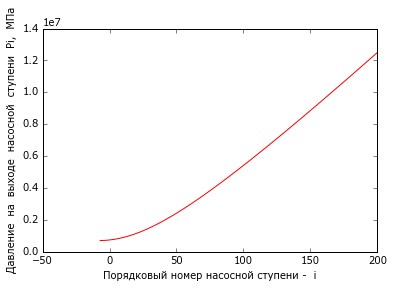

In [236]:
from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', family='Verdana')

x = my_data['Номер ступени, при кавитации'][0:277]
y = my_data['Давление на выходе ступени насосной'][0:277]
#figure()
plot(x, y, 'r')
xlabel('Порядковый номер насосной ступени -  i')
ylabel('Давление  на  выходе  насосной  ступени  Pi,  МПа')
#plt.plot()


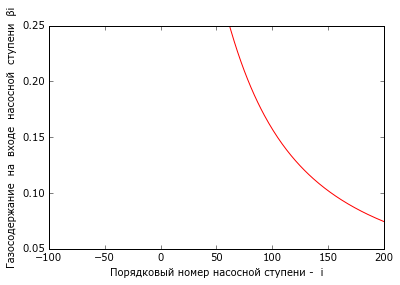

In [238]:
x = my_data['Номер ступени, при кавитации'][0:277]
y = my_data['Газосодержание на входе ступени (при кавитации)'][0:277]
#figure()
plot(x, y, 'r')
xlabel('Порядковый номер насосной ступени -  i')
ylabel('Газосодержание  на  входе  насосной  ступени  βi')
#plt.plot()


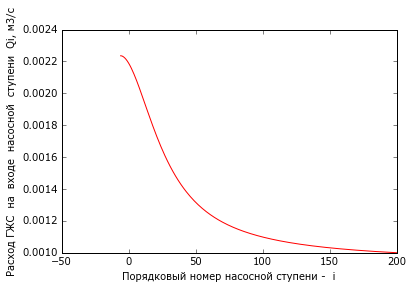

In [239]:
x = my_data['Номер ступени, при кавитации'][0:277]
y = my_data['Расход смеси ГЖС (объемный), на входе в ступень'][0:277]
#figure()
plot(x, y, 'r')
xlabel('Порядковый номер насосной ступени -  i')
ylabel('Расход ГЖС  на  входе  насосной  ступени  Qi, м3/с')
#plt.plot()


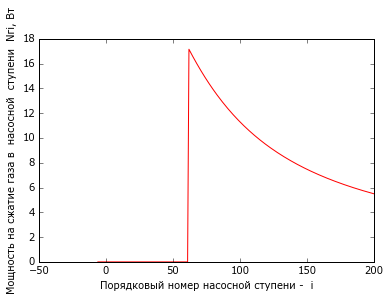

In [240]:
x = my_data['Номер ступени, при кавитации'][0:277]
y = my_data['Мощность на сжатие газа в ступени'][0:277]
#figure()
plot(x, y, 'r')
xlabel('Порядковый номер насосной ступени -  i')
ylabel('Мощность на сжатие газа в  насосной  ступени  Nгi, Вт')
#plt.plot()


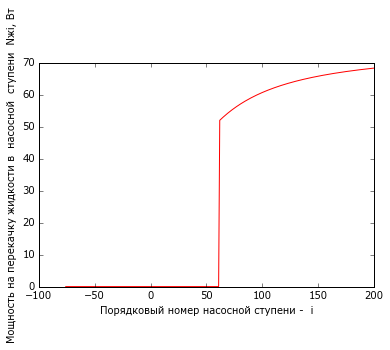

In [241]:
x = my_data['Номер ступени, при кавитации'][0:277]
y = my_data['Мощность на перекачку жидкости в ступени'][0:277]
#figure()
plot(x, y, 'r')
xlabel('Порядковый номер насосной ступени -  i')
ylabel('Мощность на перекачку жидкости в  насосной  ступени  Nжi, Вт')
#plt.plot()


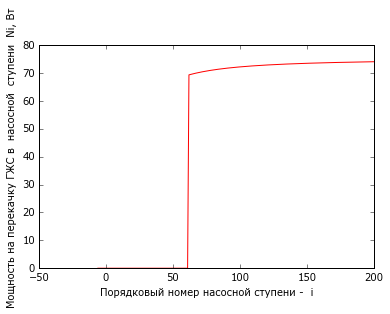

In [242]:
x = my_data['Номер ступени, при кавитации'][0:277]
y = my_data['Мощность на перекачку ГЖС в ступени'][0:277]
#figure()
plot(x, y, 'r')
xlabel('Порядковый номер насосной ступени -  i')
ylabel('Мощность на перекачку ГЖС в  насосной  ступени  Ni, Вт')
#plt.plot()